# Introduction to Pymunk

This lesson is intended to provide educators an introduction to Pymunk, a Python package that can create interactive kinematics simulations in two dimensions. Using this package, an educator can create simulations that demonstrate basics physics concepts like energy and momentum; these simulations can be modified by students in order to gain a deeper understanding of the underlying concepts. By using computer simulations, it is possible to let students explore more intricate systems than they might otherwise due to factors such as a limited number of physical setups. It can be especially helpful simulating systems that tend to produce incredibly noisy data when done with physical equipment.

## Pymunk

Pymunk is a software package that provides accessible tools to perform simulations of classical physical systems in two dimension. It is object-oriented; that is, it has classes like `Space`, `Body`, `Shape`, and `Constraint`. We will be thus be constructing objects that belong to these classes. These objects then have properties (e.g. `Body` has properties like mass and moment of intertia) as well as methods that will allow us to access and change those properties.

## A note on units

The units in Pymunk do not represent anything physical but are merely arbitrary units. As such, it is not critical to use familiar values from real-world physics. It is often much more useful to use arbitrary values, adjusting them as we test our code to ensure that a viewer can readily understand the visualized output of the simulation.

## The basics

### Space

One of the most important concepts in Pymunk is the Space object. This is the two-dimensional region in which our simulation will take place, and almost every simulation will start by constructing this object:
```python
space = pymunk.Space() # This does not usually take in arguments
```
Next it is important to set the gravity in the space:
```python
space.gravity = (x,y)
```
Note that this function takes in two arguments, representing the strength of a uniform gravitational field in the $x$ and $y$ directions, respectively. Typically, if we are representing a top-down view of a system, both of these values will be zero; if we are representing a side-on view of a system, $x$ will be 0 and $y$ will be negative, representing a downward pull.

### Bodies

Once we have a Space, we will populate it with bodies. When we construct these, we can provide their mass, moment of inertia. By default, these bodies are `DYNAMIC`, moving around and reacting to forces. However, we can also make `STATIC` bodies that cannot move.

### Shapes

Unless a body is a point mass, we must construct a `shape` associated with it. This shape defines the physical extent of the body, which is important for collisions. This object also has the `friction` property, allowing control over the coefficient of kinetic friction. Pymunk uses the Coulomb friction model that is commonly taught in introductory physics courses, where the force due to friction is $F_f = \mu_k F_N$, where $\mu_k$ is the coefficient of kinetic friction and $F_N$ is the normal force.

## Installing Pymunk

This notebook assumes that the user has already installed Python as well as Pymunk and its requirements. If this is being used on WVU's Thorny Flat cluster using OnDemand with the most recent version of Python, this will already be the case. Otherwise, you must install it yourself. 

Once python is installed, Pymunk can be installed with `pip install pymunk`

If you want to use Pymunk with Conda, use the command `conda install -c conda-forge pymunk`

## Getting Started

We will start with a basic simulation of two balls colliding to introduce the essential functions in Pymunk. By doing this experiment computationally, we are able to eliminate several common sources of error that we would encounter in the real world, such as friction or performing the experiment on an uneven surface. 

Here, we will establish the basic approach that we will follow throughout the other examples.
1. Establish the *space*
1. Define *bodies*, give them *shapes*, and then add them to the space
1. Step the simulation forward in time, animating it

<IPython.core.display.Javascript object>


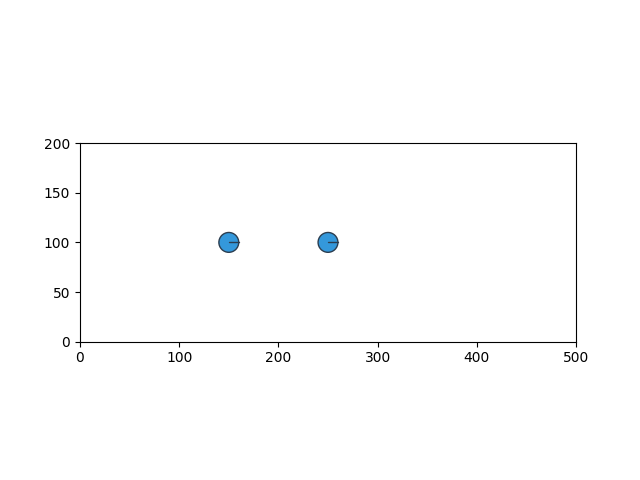

In [1]:
%reset -f
%matplotlib notebook
import pymunk as pm
from pymunk.vec2d import Vec2d
import matplotlib.pyplot as plt
import pymunk.matplotlib_util as pmplt
from matplotlib import animation as anm

space = pm.Space()
# space.gravity = (-500,0)
collision_elasticity = 1.0 # ranges from 0 (perfectly inelastic) to 1 (perfectly elastic)

mass1 = 10
radius1 = 10
ball1_body = pm.Body(mass=mass1,moment=pm.moment_for_circle(mass1, 0, radius1, (0,0)))
ball1_body.position = (100,100)
ball1_body.start_position = Vec2d(*ball1_body.position)
# ball1_body.apply_impulse_at_local_point(Vec2d(+12000, 0))
ball1_shape = pm.Circle(ball1_body,radius1)
ball1_shape.elasticity = collision_elasticity
space.add(ball1_body,ball1_shape)

mass2 = 10
radius2 = 10
ball2_body = pm.Body(mass=mass2,moment=pm.moment_for_circle(mass2, 0, radius2, (0,0)))
ball2_body.position = (250,100)
ball2_body.start_position = Vec2d(*ball2_body.position)
ball2_shape = pm.Circle(ball2_body,radius2)
ball2_shape.elasticity = collision_elasticity
space.add(ball2_body,ball2_shape)

fig = plt.figure()
ax = plt.axes(xlim=(0, 500), ylim=(0, 200))
ax.set_aspect("equal")
o = pmplt.DrawOptions(ax)
# space.debug_draw(o)
space.shapes[0].body.apply_impulse_at_local_point((5000,0))


def init():
    space.debug_draw(o)
    return []

steps_per_second = 200
substeps = 10
def animate(dt):
    for x in range(substeps):
        space.step(1/steps_per_second/substeps)
    ax.clear()
    ax.set_xlim(0,500)
    ax.set_ylim(0,200)
    space.debug_draw(o)
    return []

frames = 150
anim = anm.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False, repeat=False)

While we can ignore factors like friction and sloped surfaces if we want, we also have the power the change the simulation an environment to mimic these if we so choose. 

For example, suppose we wanted to examine how the collision changes if our "table" were sloped to the left. We can simulate this by applying gravity in the $-x$ direction.

We can also use the elasticity parameter of the bodies to explore inelastic, perfectly elastic, and super elastic collisions.

## Simple pendulum

Next, we'll introduce the idea of connecting objects together by making a simple pendulum. We accomplish this using a `constraint` object, specifically the `PinJoint`. This allows us to connect two bodies together with a perfectly rigid, massless rod. For this example, we will connect our circle to a static point in space. It is important to note that we must supply coordinates for *where* on each body we attach the PinJoint; these coordinates are in each bodies own coordinate system. That is, the coordinates for the the connection to `space.static_body` are the same as for the space as a whole, but the coordinates for the connection to the circle are measured from the center of that circle.

We can also easily explore the damped oscillator by applying damping to the whole space. When we change the `damping` property of `Space`, we are periodically reducing the velocity of every body in the space.

<IPython.core.display.Javascript object>


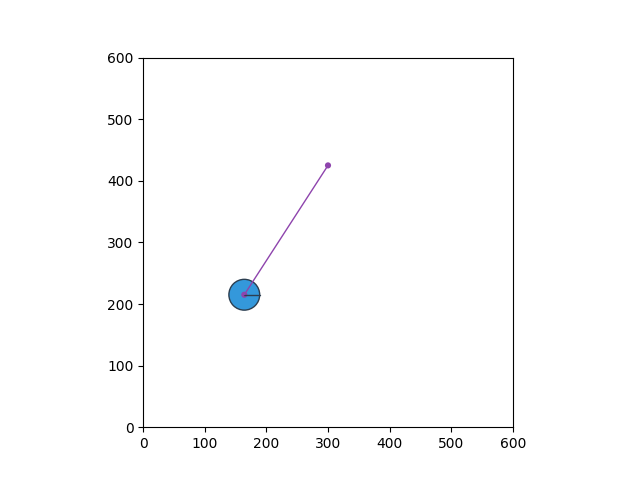

In [2]:
%reset -f
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation as anm
import pymunk as pm
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util as pmplt

space = pm.Space()
space.gravity = 0,-9820
# space.damping = 0.2

mass = 10
radius = 25
body = pm.Body(mass,pm.moment_for_circle(mass, 0, radius, (0,0)))
body.position = (300, 175)
body.start_position = Vec2d(*body.position)
shape = pm.Circle(body, radius)
space.add(body, shape)
pj = pm.PinJoint(space.static_body, body, (300, 425), (0,0))
space.add(pj)
        
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")
o = pmplt.DrawOptions(ax)

space.shapes[0].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

steps_per_second = 200
substeps = 10
def animate(dt):
    for x in range(substeps):
        space.step(1/steps_per_second/substeps)
    ax.clear()
    ax.set_xlim(0,600)
    ax.set_ylim(0,600)
    space.debug_draw(o)
    return []

frames = 500
anim = anm.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False, repeat=False)

## Coupled Oscillators

One possible use of Pymunk is to simulate coupled oscillators like the double pendulum. While this system is straightforward to build physically, it can be tricky to reliably start the pendulum in a way that demonstrates the principles you're covering. Students are frequently first taught the math behind the double pendulum in two dimension, and the focus is usually on the fundamental modes of the system. However, it can be difficult to reliably get the pendulum swinging in a way that demonstrates these principles. It's very easy to accidentally to start the pendulum in a way that swings in three dimensions, and some of the fundamental modes can require precise angles. 

Pymunk can help solve both of these problems. We can simulate a basic double pendulum by modifying our example from above, adding another circle below the first and placing a second PinJoint between them.

<IPython.core.display.Javascript object>


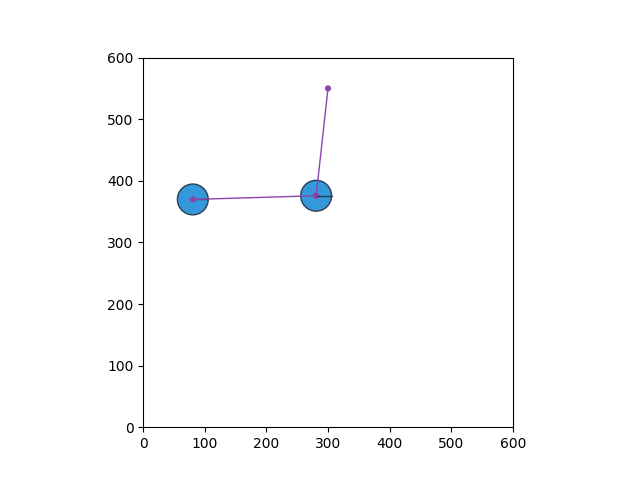

In [3]:
%reset -f
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation as anm
import pymunk as pm
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util as pmplt

space = pm.Space()
space.gravity = (0,-9820)

mass = 10
radius = 25
body1 = pm.Body(mass,pm.moment_for_circle(mass, 0, radius, (0,0)))
body1.position = (300, 375)
# body1.position = (275, 350)
body1.start_position = Vec2d(*body1.position)
shape1 = pm.Circle(body1, radius)
space.add(body1, shape1)
pj1 = pm.PinJoint(space.static_body, body1, (300, 550), (0,0))
space.add(pj1)

mass = 10
radius = 25
body2 = pm.Body(mass,pm.moment_for_circle(mass, 0, radius, (0,0)))
body2.position = (300, 175)
# body2.position = (250, 150)
body2.start_position = Vec2d(*body2.position)
shape2 = pm.Circle(body2, radius)
space.add(body2, shape2)
pj2 = pm.PinJoint(body1, body2, (0,0), (0,0))
space.add(pj2)

        
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")
o = pmplt.DrawOptions(ax)

space.shapes[0].body.apply_impulse_at_local_point((-12000,0))
space.shapes[1].body.apply_impulse_at_local_point((20000,0))
    
def init():
    space.debug_draw(o)
    return []

steps_per_second = 100
substeps = 10
def animate(dt):
    for x in range(substeps):
        space.step(1/steps_per_second/substeps)
    ax.clear()
    ax.set_xlim(0,600)
    ax.set_ylim(0,600)
    space.debug_draw(o)
    return []

frames = 1000
anim = anm.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False, repeat=False)

This is an example of a chaotic system; that is, the exact path that the masses will change dramatically with only a small change to our initial conditions. There are also fundamental modes to this system, in which the pendulum will oscillate in a very predictable manner.

## 



## Projectile Motion

Next, we'll simulate a common projectile motion demo that demonstrates the equal pull of gravity on all objects, regardless of their mass. This is sometimes called "Monkey and Hunter"; the premise is that some projectile is being aimed at a target, but the target is released from rest at the same moment that the projectile is being released. However, the person aiming the projectile is aware of this, and wants to know where they should aim to still hit the target. When analyzing this scenario, we find that if the projectile is aimed at the starting location of the target, then the projectile will hit the target.

<IPython.core.display.Javascript object>


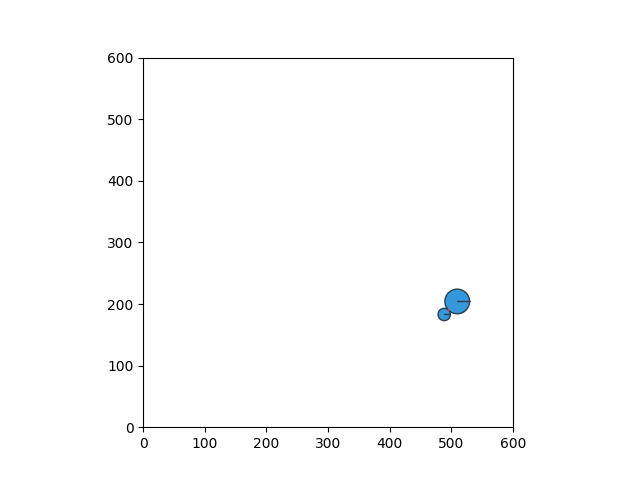

In [4]:
%reset -f
%matplotlib notebook
import pymunk as pm
from pymunk.vec2d import Vec2d
import matplotlib.pyplot as plt
import pymunk.matplotlib_util as pmplt
from matplotlib import animation as anm

space = pm.Space()
space.gravity = (0,-9800)

mass1 = 10
radius1 = 10
ball1_body = pm.Body(mass=mass1,moment=pm.moment_for_circle(mass1, 0, radius1, (0,0)))
ball1_body.position = (100,100)
ball1_body.start_position = Vec2d(*ball1_body.position)
ball1_body.apply_impulse_at_local_point(Vec2d(17500, 17500))
ball1_shape = pm.Circle(ball1_body,radius1)
space.add(ball1_body,ball1_shape)

mass2 = 50
radius2 = 20
ball2_body = pm.Body(mass=mass2,moment=pm.moment_for_circle(mass2, 0, radius2, (0,0)))
ball2_body.position = (500,500)
ball2_body.start_position = Vec2d(*ball2_body.position)
ball2_shape = pm.Circle(ball2_body,radius2)
space.add(ball2_body,ball2_shape)

fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")
o = pmplt.DrawOptions(ax)

def init():
    space.debug_draw(o)
    return []

steps_per_second = 200
substeps = 10
def animate(dt):
    for x in range(substeps):
        space.step(1/steps_per_second/substeps)
    ax.clear()
    ax.set_xlim(0,600)
    ax.set_ylim(0,600)
    space.debug_draw(o)
    return []

frames = 50
anim = anm.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False, repeat=False)

## Mass on a Spring

Here, we will demonstrate another constraint object, the damped spring. This is another example of an oscillator, although there are many other demos that can be done using springs. This constraint object works similarly to the previous PinJoint; it connects two objects from user-defined points on those objects and limits how the distance between them can change. However, because springs provide a restoring force instead of simply forcing the objects to stay a fixed difference apart, we must provide some extra parameters to this object. We must define the `rest_length` (the length of the spring when no force is applied); the `stiffness` (how much the spring stretches or compresses when a force is applied); and the `damping`, which will gradually slow our oscillating mass down.

<IPython.core.display.Javascript object>


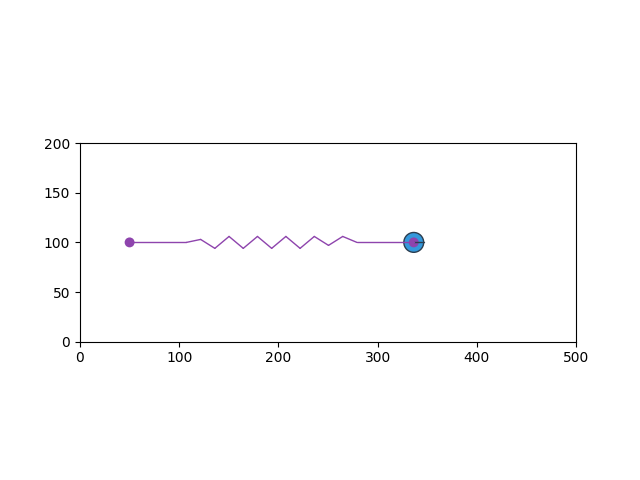

In [6]:
%reset -f
%matplotlib notebook
import pymunk as pm
from pymunk.vec2d import Vec2d
import matplotlib.pyplot as plt
import pymunk.matplotlib_util as pmplt
from matplotlib import animation as anm

space = pm.Space()
# space.gravity = (0,-9000)

mass1 = 10
radius1 = 10
body = pm.Body(mass=mass1,moment=pm.moment_for_circle(mass1, 0, radius1, (0,0)))
body.position = (250,100)
body.start_position = Vec2d(*body.position)
body.apply_impulse_at_local_point(Vec2d(12000, 0))
shape = pm.Circle(body,radius1)
space.add(body,shape)

spring = pm.DampedSpring(space.static_body, body, (50, 100), (0,0), rest_length=200,stiffness=1500,damping=10)
# spring = pm.DampedSpring(space.static_body, body, (50, 100), (0,0), rest_length=200,stiffness=1500,damping=500) # overdamped
space.add(spring)

fig = plt.figure()
ax = plt.axes(xlim=(0, 500), ylim=(0, 200))
ax.set_aspect("equal")
o = pmplt.DrawOptions(ax)
# space.debug_draw(o)
space.shapes[0].body.apply_impulse_at_local_point((5000,0))

def init():
    space.debug_draw(o)
    return []

steps_per_second = 200
substeps = 10
def animate(dt):
    for x in range(substeps):
        space.step(1/steps_per_second/substeps)
    ax.clear()
    ax.set_xlim(0,500)
    ax.set_ylim(0,200)
    space.debug_draw(o)
    return []

frames = 1000
anim = anm.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False, repeat=False)

By changing the damping value, we can explore undamped systems, as well as underdamping, critical damping, and overdamping.